# Práctica 3.3: Aprendizaxe en RNA por retropropagación

<center><h3>
    Álex Baquero Domínguez
</h3></center>

## Instrucións

Isto é un **Jupyter Notebook**, un documento que integra código Python nun arquivo Markdown.
Isto permítenos, ir exexutando celdas de código pouco a pouco, así como xerar automáticamente un informe ben formateado da práctica.

Podes engadir unha celda co botón **"Insert"** da barra de ferramentas, e cambiar seu tipo con **"Cell > Cell Type"**

Para executar unha celda de código, seleccionarémola e pulsaremos a botón **"▶ Run"** da barra de ferramentas.
Para pasar o documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Segue este guión ata o final. Executa o código proporcionado paso a paso comprendendo o que estás a facer e reflexionando sobre os resultados. Haberá preguntas intercaladas ao longo do guión, responde a todas elas na sección reservada para ese fin: **"Respostas ao cuestionario"**. Por favor, non modifiques ningunha liña de código agás cando se che pida explícitamente.

Non esquezas insertar o teu **nome e apelidos** na celda superior.

## Entrega da práctica

A data límite de entrega será a indicada no Campus Virtual. A entrega consistirá nun único arquivo comprimido co nome `APELIDOS_NOME_RNA.zip` que conteña os seguintes ficheiros:

 * `APELIDOS_NOME_RNA.html`: Arquivo HTML froito da exportación do presente Notebook, coas preguntas respondidas ao final do documento.
 * `APELIDOS_NOME_RNA.ipynb`: Arquivo Jupyter Notebook fonte.
 * Arquivo de datos do problema de libre elección.

## Números aleatorios

<span style="color:red">**MOI IMPORTANTE:**</span> Vamos a establecer un *seed* cun valor predefinido inmediatamente antes de executar calquera operación cun compoñente aleatorio. Así nos aseguraremos de que os nosos resultados sexan repetibles.

Isto é, imos poñer `np.random.seed(SEED_VALUE)` antes de:
 - `train_test_split()`
 - `fit()`
 - `predict()`
 
Tamén imos poñer `random_state=SEED_VALUE` en aquelas funcións que o admitan (coma o construtor de `MLPRegressor`).

Haberá ocasión nas que isto sexa excesivo, pero así curámonos en despistes.

# Introdución

Nesta práctica imos repasar os conceptos vistos nas clases teóricas sobre redes neuronais e retropropagación. Coma de costume, comezaremos traballando sobre un problema sinxelo e máis que coñecido, o da estimación do prezo das vivendas, para logo abordar un máis complexo, o recoñecemento de díxitos manuscritos. O último exercicio desta práctica é optativo e consiste en modelar unha rede neuronal para un problema elixido por ti mesmo.

# Estimación do prezo das vivendas

Imos recuperar o dataset `vivendas.csv`. Volvemos a ser aquela inmobiliaria que quere desenvolver unha ferramenta para estimar o prezo de venda dos inmobles.

Importa o dataset `vivendas.csv` e divídeo en dous subconxuntos, un de adestramento co 70% dos datos (`vivendas_train`) e outro de test cos datos restantes (`vivendas_test`). **Non esquezas usar `np.random.seed` e `random_state`**.

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
SEED_VALUE = 20

np.random.seed(SEED_VALUE)
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE")###
vivendas = pd.read_csv('vivendas.csv', delimiter=',', header=0)
vivendas_train,vivendas_test = train_test_split(vivendas, test_size=0.3, random_state=SEED_VALUE)
print('Tamaño train: {}'.format(vivendas_train.shape[0]))
print('Tamaño test: {}'.format(vivendas_test.shape[0]))

Tamaño train: 51
Tamaño test: 22


Podemos visualizar os nosos conxuntos:

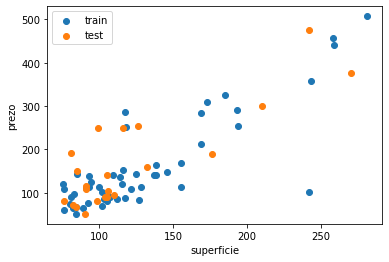

In [54]:
import matplotlib.pyplot as plt  # Importamos a libraría (isto sólo é necesario facelo unha vez)

# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter de train
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'], label='train')

# Debuxamos o scatter de test
ax.scatter(vivendas_test['superficie'], vivendas_test['prezo'], label='test')

ax.legend()  # Facemos que se mostren as labels

plt.show()

Agora deberemos dividir os conxuntos en variables preditoras (`vivendas_train_X` e `vivendas_test_X`) e variables dependentes (`vivendas_train_Y` e `vivendas_test_Y`):

In [55]:
### COMPLETA O SCRIPT ###
# Dividimos o dataset en variables predictoras e dependentes:
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']

vivendas_test_X = vivendas_test.loc[:, :'superficie'].astype(float)
vivendas_test_Y = vivendas_test.loc[:, 'prezo']

## Función `MLPRegressor`

Lembremos que unha rede neuronal está formada de tres compoñentes principais: as *neuronas*, as *funcións de activación* de cada unha delas e os *pesos* de cada unha das conexións entre neuronas.

Imos construir a nosa primera rede neuronal empregando a función `MLPRegressor` que proporciona o paquete de `scikit-learn`. Imos empregar a función de activación loxística (ou sigmoidal) `activation='logistic'`. Lembremos que o problema do prezo das vivendas é un problema de **regresión**, no que tomamos como entrada un único valor, a superficie do inmoble, e queremos obter como saída outro valor, o prezo estimado do mesmo. Polo tanto, o tamaño das capas de entrada e saída da rede neuronal que modele o problema será igual a 1, é dicir, bástanos cunha neurona na entrada e outra na saída. Imos empregar tamén unha terceira capa entre a capa de entrada e a capa de saída, o que se coñece como capa oculta, que polo de agora vai ter tres neuronas. Esta rede ten o seguinte aspecto:

![](rede-simple.png "Rede")

Xa podemos empregar a clase `MLPRegressor` para crear a nosa primeira rede. A esta función pasámoslle o número de neuronas na capa oculta con `hidden_layer_sizes`. Ademais podemos fixar un número de iteracións con `max_iter` (por defecto son 200) Con `learning_rate_init=0.0025` lle indicamos canto queremos que se actualicen os pesos en cada iteración (velocidade de aprendizaxe) e con `n_iter_no_change=float('inf')` facemos que continúe o adestramento pese a que o modelo non mellore, pois queremos que alcance o número de iteracións que lle esiximos (esto fará que nos apareza un ***WARNING***, pero non hai que preocuparse). O método de aprendizaxe que empregaremos é `adam` (o cal funciona especialmente ben con moitas iteracións):

In [56]:
from sklearn.neural_network import MLPRegressor  # Importamos a clase (isto sólo é necesario facelo unha vez)

# Definimos o modelo
model_vivendas_1 = MLPRegressor(hidden_layer_sizes=3, max_iter=10000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)

# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_1.fit(vivendas_train_X, vivendas_train_Y)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=3,
             learning_rate_init=0.0025, max_iter=10000, n_iter_no_change=inf,
             random_state=20)

Agora podemos botarlle un ollo aos pesos aprendidos pola rede:

In [57]:
weights = np.concatenate([w.flatten() for sublist in [model_vivendas_1.coefs_, model_vivendas_1.intercepts_] for w in sublist])
weights

array([-1.16661678e-01,  1.93876215e-01,  1.85750432e-01,  4.09958577e-03,
        2.38069168e+01,  2.40041155e+01,  1.59086583e-01,  8.37404003e+00,
        9.06584450e+00,  2.33477783e+01])

> ❓ **_Pregunta 1._**  Por que obtemos 10 pesos se dixemos que a nosa rede ten un total de 5 neuronas? Se non das coa resposta, continúa avanzando, pode que chegues a ela máis adiante.

Agora predicimos os valores das vivendas do conxunto de test coa axuda da función `predict`:

In [58]:
np.random.seed(SEED_VALUE)
predicions_1 = model_vivendas_1.predict(vivendas_test_X)

Para avaliar as predicións anterirores, recuperamos a función do erro cadrático medio da práctica 3.1:

In [59]:
### Erro cadrático medio ###
def ecm(reais, predicion):
    m = len(reais)  # tamaño do conxunto de datos
    erro = sum((predicion - reais)**2) / (2*m)
    return erro

Calcula o erro cadrático medio das predicións que acabamos de realizar.

In [60]:
### COMPLETA O SCRIPT ###
erro = ecm(vivendas_test_Y, predicions_1)
erro

10462.630182910192

Que che parece este erro? Se lembras os resultados que obtivemos con regresión lineal daraste conta de que as predicións da rede neuronal son moi malas e o ECM moi alto. Bótalle un ollo aos 6 primeiros valores do array de predicións:

In [61]:
predicions_1[:6]

array([71.15881054, 71.1588109 , 71.15881055, 71.15881053, 71.15881055,
       71.15881076])

Algo non funcionou? O que sucede é que nosa rede neuronal non é capaz de xeneralizar o coñecemento. Este fenómeno coñécese como ___underfitting___, ou axuste insuficiente. O *underfitting* pode darse por múltiples causas, como o baixo número de mostras no noso conxunto de adestramento ou a mala elección das características que eliximos para representar o problema. Sen embargo, neste caso o motivo é outro. O rendemento dunha rede neuronal pode verse moi deteriorado se empregamos os datos en bruto sen normalizar. Moitas veces o algoritmo non converxerá antes do número máximo de iteracións permitidas. **Normalizar** non é máis que comprimir ou extender os valores dunha variable para que estén acoutados nun rango desexado. Existen diferentes métodos para normalizar os datos. Neste caso imos empregar o método *min-max* para escalar os datos das variables `superficie` e `prezo` ao rango [0,1]. Simplemente, para cada valor concreto $a_i$ dunha variable $a$, o seu correspondente valor normalizado $z_i$ virá dado por:
$$ z_i = \frac{a_i - \min(a)}{\max(a) - \min(a)} $$

En Python podemos implementar unha función que tome como entradas as mostras (de adestramento e test) dunha variable e nolas devolva escaladas:

In [62]:
### Normalización min-max ###
def norm_min_max(train, test):
    maximo = train.max()
    minimo = train.min()
    z_train = (train - minimo) / (maximo - minimo)
    z_test = (test - minimo) / (maximo - minimo)
    
    return z_train, z_test

Empregando a función anterior, normalizamos o dataset e volvemos a obter os conxuntos de train e test:

In [63]:
vivendas_train_n, vivendas_test_n = norm_min_max(vivendas_train, vivendas_test)
vivendas_train_n

,superficie,prezo
1,0.203883,0.516958
55,0.305825,0.245766
24,0.456311,0.509543
14,0.024272,0.049403
59,0.131068,0.041484
56,0.893204,0.854642
68,0.155340,0.085469
66,0.242718,0.200750
57,0.300971,0.195310
27,1.000000,1.000000


> ❓ **_Pregunta 2._**  Observa detidamente os dous últimos scripts. Por que cres que a función `norm_min_max` trata internamente de distinto xeito os conxuntos de train e test? Cres que poderiamos normalizar a variable primeiro e logo facer a división en subconxuntos adestramento e test? Por que normalizamos de xeito independente cada variable? Non sería máis doado calcular o máximo e o mínimo de todo o dataframe?

Constrúe unha rede neuronal coas mesmas características que a anterior pero empregando os **datos normalizados**. Este modelo chamarase `model_vivendas_2`. **Non esquezas o seed**. (Pista: Comeza por dividir novamente os datos en variables predictoras e dependentes)

In [64]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###
np.random.seed(SEED_VALUE)

# Dividimos o dataset en variables predictoras e dependentes
vivendas_train_X_n = vivendas_train_n.loc[:, :'superficie'].astype(float)
vivendas_train_Y_n = vivendas_train_n.loc[:, 'prezo']
vivendas_test_X_n = vivendas_test_n.loc[:, :'superficie'].astype(float)
vivendas_test_Y_n = vivendas_test_n.loc[:, 'prezo']

# Definimos o modelo 2 e entrenamos a rede:
model_vivendas_2 = MLPRegressor(hidden_layer_sizes=3, max_iter=10000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)
model_vivendas_2.fit(vivendas_train_X_n, vivendas_train_Y_n)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=3,
             learning_rate_init=0.0025, max_iter=10000, n_iter_no_change=inf,
             random_state=20)

Fai de novo as predicións dos prezos do conxunto de test e obtén o seu ECM. Lembra que os datos agora están normalizados, polo tanto a predición e o ECM tamén o van estar. Para obter valores que poidamos interpretar en euros, tes que "desnormalizar" as predicións: 
$$ a_i =  z_i \times [\max(a) - \min(a)] + \min(a)  $$

In [65]:
np.random.seed(SEED_VALUE)

predicions_2_n = model_vivendas_2.predict(vivendas_test_X_n)
predicions_2 = (predicions_2_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])

ecm(vivendas_test['prezo'], predicions_2)

2050.702240695393

O número de capas ocultas que empreguemos así como o número de neuronas en cada unha delas teñen moita influencia na efectividade do noso modelo. Crea agora empregando os **datos normalizados** unha rede cunha capa oculta de **53 neuronas** e mide o seu rendemento. Este modelo chamarase `modelo_vivendas_3`. Fixa o límite de **iteracións a 30000**.

In [66]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###
# Definimos o modelo
model_vivendas_3 = MLPRegressor(hidden_layer_sizes=53, max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)
# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_3.fit(vivendas_train_X_n, vivendas_train_Y_n)
predicions_3_n = model_vivendas_3.predict(vivendas_test_X_n)
predicions_3 = (predicions_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
ecm(vivendas_test['prezo'], predicions_3)

3694.235944034918

Se fixeches todo ben, verás que non consegues mellorar as predicións de test aumentando o número de neuronas, senon todo o contrario. Como é isto posible? Imos botarlle un ollo ao axuste que fai o modelo sobre os datos de adestramento.

In [68]:
np.random.seed(SEED_VALUE)

predicions_train_3_n = model_vivendas_3.predict(vivendas_train_X_n)
predicions_train_3 = (predicions_train_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ecm(vivendas_train['prezo'], predicions_train_3)

1041.4211620468025

Observa que o ECM que se comete sobre o conxunto de adestramento é moi baixo, pero cando probamos o modelo con novos datos, este non é capaz de xeneralizar e o erro dispárase. Este fenómeno denomínase *overfitting*, ou sobreaxuste. As redes neuronais teñen unha forte tendencia ao sobreaxuste, o que implica que resultan moi boas atopando relacións nos datos de adestramento pero, pola contra, non son tan efectivas cando se lles presentan datos novos.

O seguinte fragmento de código grafica os axustes das 3 redes que levamos creado ata o de agora. 

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


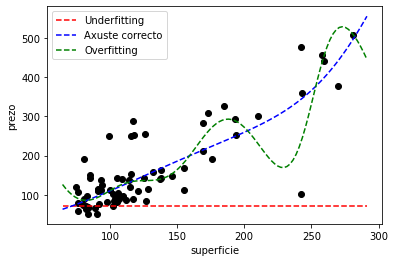

In [69]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas['superficie'], vivendas['prezo'], color='black')

line_x_vals = np.expand_dims(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=100), axis=-1)  # Obtemos unha serie de valores ao longo do eixo X
line_x_vals_n = (line_x_vals - vivendas_train.min()['superficie']) / (vivendas_train.max()['superficie'] - vivendas_train.min()['superficie'])

# Creamos e mostramos o modelo 1
line_y_vals_model_1 = model_vivendas_1.predict(line_x_vals)
ax.plot(line_x_vals, line_y_vals_model_1, '--', color='r', label='Underfitting')

# Creamos e mostramos o modelo 2
line_y_vals_model_2_n = model_vivendas_2.predict(line_x_vals_n)
line_y_vals_model_2 = (line_y_vals_model_2_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ax.plot(line_x_vals, line_y_vals_model_2, '--', color='b', label='Axuste correcto')

# Creamos e mostramos o modelo 3
line_y_vals_model_3_n = model_vivendas_3.predict(line_x_vals_n)
line_y_vals_model_3 = (line_y_vals_model_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ax.plot(line_x_vals, line_y_vals_model_3, '--', color='g', label='Overfitting')


ax.legend()  # Facemos que se mostren as labels

plt.show()  # Mostramos a figura

> ❓ **_Pregunta 3._**  Explica a gráfica anterior, comentando que representan os puntos nas distintas cores, as liñas, etc., e comparando as tres propostas.

Non existe ningunha regra universal ou ecuación que nos permita coñecer o número óptimo de neuronas e capas a empregar nas nosas redes. Habitualmente, unha única capa oculta soe ser dabondo para unha ampla variedade de aplicacións. Polo que respecta ao número de neuronas da(s) capa(s) oculta(s), é habitual que estea entre o tamaño da capa de entrada e o da capa de saída. Típicamente para acadar boas configuracións de parámetros realízanse sucesivos adestramentos variando a arquitectura da rede e avalíanse mediante técnicas como ___cross validation___, que basicamente consisten en realizar o adestramento varias veces, variando o conxunto de datos de adestramento e test, necesario entre outras cousas para detectar cando o axuste é correcto e cando se produce *overfitting*.

## Profundizando no MLP

Agora xa sabemos empregar a función `MLPRegressor` para crear un Multi-layer Perceptron para a regresión de valores. Imos profundizar un pouco máis no seu uso e comprender o que fai.

Empregando a función `plotMLP` imos amosar a rede que entrenamos:

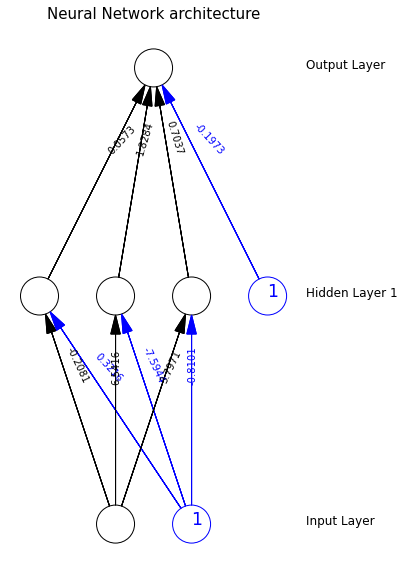

[array([ 0.32155975, -7.59444543, -0.8101463 ]), array([-0.19731579])]

In [70]:
from scikit_plot import plotMLP  # Importamos a libraría (isto sólo é necesario facelo unha vez)

plotMLP(model_vivendas_2, figsize=(10, 10))
model_vivendas_2.intercepts_

> ❓ **_Pregunta 4._**  Que representan os nodos e as frechas en cor azul na figura anterior? Por que teñen un número 1 eses nodos? Revisa a túa resposta da Pregunta 1 se é preciso.

En `MLPRegressor` podemos usar o parámetro `hidden_layer_sizes` non só para indicar o número de neuronas nunha única capa oculta. Se en lugar dun único valor enteiro lle pasamos unha lista de enteiros, a función vai interpretar que desexamos ter tantas capas ocultas como elementos hai na lista. Deste xeito, o primeiro valor do vector indicará o número de neuronas da primeira capa oculta, o segundo o da segunda, etc. Crea agora unha rede neuronal (`model_vivendas_4`) que teña **tres capas ocultas**, de xeito que a primeira delas teña **2 neuronas**, **a segunda 4** e **a terceira 3**. Avalía o modelo e representa gráficamente a rede.

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


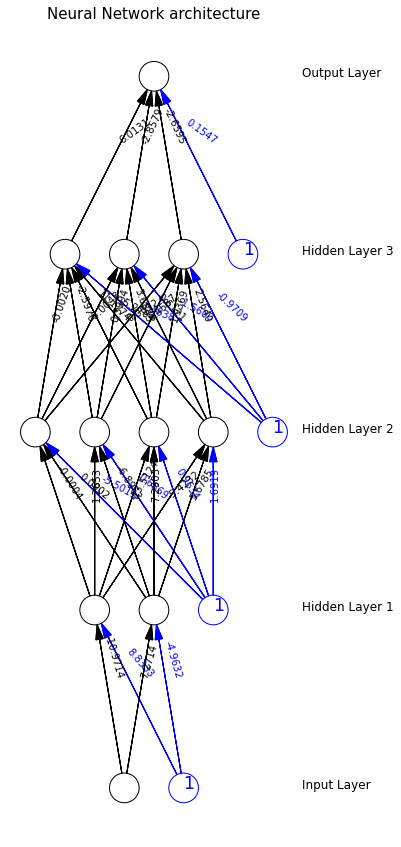

In [71]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###
np.random.seed(SEED_VALUE)

model_vivendas_4 = MLPRegressor(hidden_layer_sizes=[2,4,3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)
model_vivendas_4.fit(vivendas_train_X_n, vivendas_train_Y_n)


plotMLP(model_vivendas_4, figsize=(15, 15))

O *learning rate* (coeficiente de velocidade de aprendizaxe) determina canto afecta a retropropagación aos pesos en cada iteración. Este coeficiente é equivalente ao $\alpha$ que vimos nas práctica 3.1 de regresión. Nas clases teóricas empregabamos a letra grega $\eta$ para referirnos a el. 

Un *learning rate* elevado implica que durante o adestramento cada iteración pode modificar fortemente os valores dos pesos ou, dito doutro xeito, o algoritmo "aprende" moito de cada un dos exemplos do dataset. Isto tamén significa que un só *outlier* pode afectar seriamente aos valores dos pesos e facer que o algoritmo diverxa e non chegue a un axuste de pesos óptimo. Pola contra, un coeficiente de aprendizaxe baixo significa que o algoritmo "aprende" menos de cada exemplo do dataset, así que a rede neuronal verase menos afectada por *outliers*, aínda que se necesitarán máis exemplos e iteracións para que o algoritmo converxa e se obteña un bo modelo. 

En `MLPRegressor` podemos axustar este coeficiente co parámetro `learning_rate_init`, que ata agora deixamos fixo a `0.0025`. esta función continúa o adestramento ata acadar `max_iter` ou converxer, polo que se empregamos un `learning_rate_init` inapropiado (moi elevado ou moi baixo), `MLPRegressor` non converxerá e amosará un *WARNING* (nos exemplos anteriores sempre se amosaba o *WARNING* porque desactivábamos o *early stopping* mediante `n_iter_no_change=float('inf')`). No seguinte script obtemos dous novos modelos prácticamente idénticos, agás polo *learning rate* empregado. 

In [72]:
import time  # Para medir tempos de execución

## Usando learningrate = 0.001
model_vivendas_5 = MLPRegressor(hidden_layer_sizes=[2, 4, 3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.001, n_iter_no_change=5000, tol=2e-6,random_state=SEED_VALUE)

np.random.seed(SEED_VALUE)

start = time.process_time()
model_vivendas_5.fit(vivendas_train_X_n, vivendas_train_Y_n)
end = time.process_time()

predicions_5_n = model_vivendas_5.predict(vivendas_test_X_n)
predicions_5 = (predicions_5_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
erro_5 = ecm(vivendas_test['prezo'], predicions_5)

print('Tempo de execución con "learning_rate = 0.001": {:.2f}s'.format(end - start))
print('Número de iteracións necesarias: {}'.format(model_vivendas_5.n_iter_))
print('Erro cadrático medio: {}'.format(erro_5))
print()


## Usando learningrate = 0.00018
model_vivendas_6 = MLPRegressor(hidden_layer_sizes=[2, 4, 3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.00018, n_iter_no_change=5000, tol=2e-6,random_state=SEED_VALUE)

np.random.seed(SEED_VALUE)

start = time.process_time()
model_vivendas_6.fit(vivendas_train_X_n, vivendas_train_Y_n)
end = time.process_time()

predicions_6_n = model_vivendas_6.predict(vivendas_test_X_n)
predicions_6 = (predicions_6_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
erro_6 = ecm(vivendas_test['prezo'], predicions_6)

print('Tempo de execución con "learning_rate = 0.00018": {:.2f}s'.format(end - start))
print('Número de iteracións necesarias: {}'.format(model_vivendas_6.n_iter_))
print('Erro cadrático medio: {}'.format(erro_6))

Tempo de execución con "learning_rate = 0.001": 3.90s
Número de iteracións necesarias: 7257
Erro cadrático medio: 1998.7191216475005

Tempo de execución con "learning_rate = 0.00018": 8.82s
Número de iteracións necesarias: 13756
Erro cadrático medio: 1893.7682135018692


> ❓ **_Pregunta 5._**  Fíxate nos tempos de execución do adestramento, número de iteracións e ECM de cada un dos modelos do script anterior. Comenta os resultados xustificando as diferenzas.

# Recoñecemento de díxitos

No seguinte exercicio imos abordar un problema de **clasificación**. Lembra que, a diferenza da regresión, a clasificación consiste en predicir unha clase, é dicir, un valor discreto, non continuo. Recorda que xa fixemos clasificación nas prácticas de CLIPS onde definiamos regras de decisión para diferenciar, por exemplo, distintos animais en base á súa taxonomía. Agora imos empregar un dataset significativamente máis grande que o anterior das vivendas (aínda que segue sendo moi pequeno se o comparamos cos tamaños que se manexan na actualidade). O novo dataset chámase `dixitos.csv` e contén imaxes de díxitos escritos a man por distintas persoas, logo o que pretendemos é obter un modelo que sexa capaz de predicir o díxito en cuestión en base a un conxunto de variables de entrada. En total existen 10 díxitos no sistema decimal, porén teremos que distinguir entre 10 clases distintas.

Comezamos como sempre cargando o dataset:

In [73]:
dixitos = pd.read_csv('dixitos.csv',
                       delimiter=',',
                       header=None)

Imos ver as súas dimensións

In [74]:
dixitos.shape

(2000, 785)

In [75]:
dixitos.iloc[:, 0:1].astype("category")

,0
0,7
1,2
2,1
3,0
4,4
...,...
1995,0
1996,6
1997,3
1998,9


In [76]:
dixitos.values

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

Co cal temos 2000 imaxes de díxitos representados por 784 variables, xa que a variable restante é a etiqueta que nos indica a que clase pertence cada exemplo, tomando valores discretos do 0 ao 9. Cada unha das 784 variables de entrada representa un valor de intensidade, de xeito que podemos ver o conxunto coma unha matriz de 28x28 píxeles, que codifican cada unha das imaxes de díxitos en escala de grises.

Co que sabemos ata aquí podemos intuir xa que a nosa rede neuronal vai ter na capa de entrada 784 variables pero, que sucede coa capa de saída? Como podemos codificar a saída para que nos diga a que clase pertence un díxito? Sendo un problema de clasificación onde diferenciamos 10 clases distintas, parece lóxico que na capa de saída haxa 10 neuronas, unha por clase (isto falo automáticamente a clase `MLPClassifier` cando definimos a saída coma un tipo `category`).
 
As seguintes funcións realizan algunhas tarefas necesarias de preprocesado: a normalización do dataset e a codificación da saída. Toma un tempo para analizalas con calma.

In [77]:
## Función de preprocesado do dataset
def preprocesar_dixitos(df):
    # Tomamos as 784 variables de entrada
    df_X = df.iloc[:, 1:]
    # Normalizamos os seus valores
    df_X = norm_num(df_X)
    
    # Tomamos a variable de saida
    df_Y = df.iloc[:, 0:1]
    # Convertímola ao tipo de dato category (pois son etiquetas que poden tomar un número delimitado de valores)
    df_Y = df_Y.astype("category")
    # Renomeamos a columna
    df_Y.columns = ['label']
    
    # Xuntamos as novas entradas normalizadas coas novas saídas codificadas
    novo_df = pd.concat([df_X, df_Y], axis=1)
    
    return novo_df

# Función para aplicar de a normalización
def norm_num(df):
    columnas_numericas = list(df.select_dtypes(include=[np.number]).columns.values)
    if len(columnas_numericas) > 0:
        # Aplicamos unha normalizacion min-max, coa diferencia de que xa sabemos que os valores van de [0, 255]
        df.loc[:, columnas_numericas] = df.loc[:, columnas_numericas] / 255.0

    return df

Imos aplicar ese preprocesado ao dataset e dividilo nos habituais conxuntos de adestramento e test:

In [78]:
dixitos_proc = preprocesar_dixitos(dixitos)

np.random.seed(SEED_VALUE)
dixitos_train, dixitos_test = train_test_split(dixitos_proc, test_size=0.3, random_state=SEED_VALUE)

dixitos_train_X = dixitos_train.loc[:, dixitos_train.columns != 'label']
dixitos_train_Y = dixitos_train.loc[:, 'label']

dixitos_test_X = dixitos_test.loc[:, dixitos_test.columns != 'label']
dixitos_test_Y = dixitos_test.loc[:, 'label']

print(dixitos_train.shape)
print(dixitos_test.shape)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


(1400, 785)
(600, 785)


Estamos listos para adestrar un novo modelo, pero primeiro imos visualizar un exemplo calquera do dataset para rematar de comprender que aspecto ten o conxunto de datos.

In [79]:
fila_exemplo = 0  # Podes cambiar este número pola fila que desexes consultar

exemplo = dixitos_train.iloc[fila_exemplo:fila_exemplo+1] 
exemplo

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,label
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Este díxito debería corresponderse co seguinte número:

In [80]:
exemplo['label']

710    5
Name: label, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

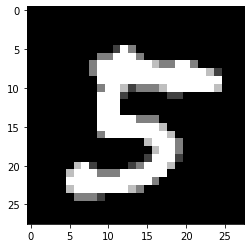

In [81]:
exemplo_values = exemplo.loc[:, exemplo.columns != 'label'].values
l = int(np.sqrt(exemplo_values.shape[1]))

exemplo_img = np.reshape(exemplo_values, [l, l])

plt.imshow(exemplo_img, cmap='gray', vmin=0, vmax=1.0)

Imos construir a rede. Lembra que xa estamos traballando con dimensións respetables de datos, polo que o adestramento non vai ser instantáneo, ten paciencia porque pode que tarde un pouco (1-2 minutos como moito).

In [82]:
from sklearn.neural_network import MLPClassifier

model_dixitos = MLPClassifier(hidden_layer_sizes=[20, 20, 20], max_iter=30000, activation='relu', solver='adam',
                              learning_rate_init=0.01, n_iter_no_change=1000, tol=1e-6, random_state=SEED_VALUE)


np.random.seed(SEED_VALUE)

start = time.process_time()
model_dixitos.fit(dixitos_train_X, dixitos_train_Y)
end = time.process_time()
print('Tempo de adestramento": {:.2f}s'.format(end - start))

Tempo de adestramento": 226.71s


> ❓ **_Pregunta 6._**  Observa o script anterior. Cantas capas ten a rede (entrada, ocultas e saída), e con cantas neuronas cada unha? Como definimos o tamaño de cada unha delas?

Facemos a predición sobre o conxunto de test:

In [83]:
np.random.seed(SEED_VALUE)
dixitos_test_pred = model_dixitos.predict_proba(dixitos_test_X)

Observa a apariencia que teñen as predicións obtidas:

In [84]:
dixitos_test_pred.shape

(600, 10)

Tomemos de exemplo a primeira predición do conxunto de test:

In [85]:
fila_exemplo = 0  # Podes cambiar este número pola fila que desexes consultar

exemplo = dixitos_test_pred[fila_exemplo] 
exemplo

for i, c in enumerate(model_dixitos.classes_):
    print('{}: {:.2f}%'.format(c, exemplo[i]*100))

0: 0.00%
1: 0.00%
2: 0.00%
3: 0.00%
4: 0.00%
5: 0.00%
6: 0.00%
7: 0.00%
8: 63.01%
9: 36.99%


No caso anterior parece que a rede cre ao 63% que ese díxito se trata dun 8, xa que da un valor de 0.6301 no segundo elemento do vector de saída (percátate de que no print anterior estamos a multiplicar a saída por 100). Vexamos cal é o seu valor real:

Valor real: [8]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


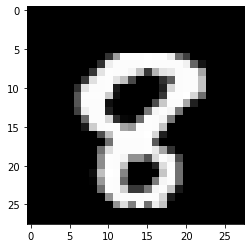

In [86]:
exemplo_test_Y = dixitos_test_Y.iloc[fila_exemplo:fila_exemplo+1]
exemplo_test_X = dixitos_test_X.iloc[fila_exemplo:fila_exemplo+1] 

exemplo_test_values = exemplo_test_X.loc[:, exemplo_test_X.columns != 'label'].values
exemplo_test_img = np.reshape(exemplo_test_values, [l, l])

plt.imshow(exemplo_test_img, cmap='gray', vmin=0, vmax=1.0)
print('Valor real: {}'.format(exemplo_test_Y.values))

Efectivamente, un 8. En regresión empregábamos o erro cadrático medio para estimar a calidade das predicións pero, como podemos facer isto nun problema de clasificación? Unha medida moi sinxela pero amplamente empregada é a ___accuracy___, ou **taxa de acerto**: 
$$ Accuracy = \frac{\text{nº de acertos}}{\text{nº de predicións}} $$

Primeiro, convertimos os vectores de predicións que obtivemos a un único valor. Para cada predición quedámonos co díxito que obtén un maior valor (isto xa o faría automáticamente a función `.predict()`):

In [87]:
dixitos_test_pred_label = model_dixitos.classes_[np.argmax(dixitos_test_pred, axis=-1)]
dixitos_test_pred_label[:6]

array([8, 8, 3, 9, 9, 3])

Nos seguites dous scripts calculamos a *accuracy*:

In [88]:
coincidencias = dixitos_test_pred_label == dixitos_test_Y
acertos = sum(coincidencias)
acertos

529

In [89]:
total = len(dixitos_test_Y) 
accuracy = acertos / total
accuracy

0.8816666666666667

> ❓ **_Pregunta 7._**  Explica cal é o contido das variables `coincidencias`, `acertos` e `total`. Que significa obter unha *accuracy* de 0.88, ou do 88%?

Finalmente, podemos ver unha matriz de confusión entre os valores reais e as predicións do seguinte xeito:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


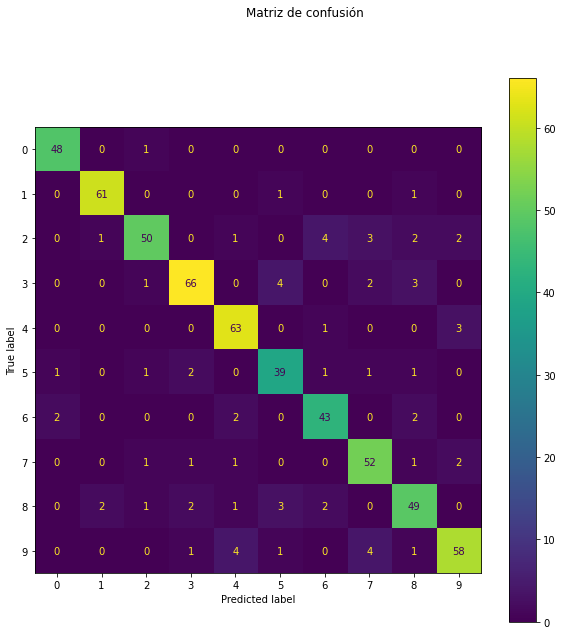

In [90]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_dixitos, dixitos_test_X, dixitos_test_Y, ax=ax)
disp.figure_.suptitle("Matriz de confusión")

plt.show()

> ❓ **_Pregunta 8._**  Cales son as conclusións máis relevantes que se poden extraer da matriz anterior?

**************************************************************

# Respostas ao cuestionario (10 puntos)

**Pregunta 1: Por que obtemos 10 pesos se dixemos que a nosa rede ten un total de 5 neuronas? Se non das coa resposta, continúa avanzando, pode que chegues a ela máis adiante**

Isto é debido a un término independente coñecido como bias que se vai sumando ao resto de pesos ponderados da neurona, ao añadirse a capa oculta e input:
   1. A primeira neurona suma tres conexións coas neuronas da capa oculta
   2. A segunda suma unha conexión coa neurona da capa de saída.

En resumen, temos 5 neuronas na rede e hai 10 pesos debido a inclusión de dous neuronas extras a estas.

**Pregunta 2: Observa detidamente os dous últimos scripts. Por que cres que a función `norm_min_max` trata internamente de distinto xeito os conxuntos de train e test? Cres que poderiamos normalizar a variable primeiro e logo facer a división en subconxuntos adestramento e test? Por que normalizamos de xeito independente cada variable? Non sería máis doado calcular o máximo e o mínimo de todo o dataframe?**

A  función `norm_min_max` trata internamente de distinto xeito aos conxuntos para conseguir que os datos do test non interfieran na normalización do modelo. Non poderiamos facelo ao revés: primeiro normalizar e logo facer a división, debido a que os resultados modificaríanse.

Non sería mais doado normalizar as variables a nivel global. Débese facer de xeito independente a cada variable. Se calculas o máximo e o mínimo de todo o dataframe, os datos normalizados serían outros pois os máximos e os mínimos tamén o serían. Todo isto variaría o resultado obtido e polo tanto os pesos das diferentes neuronas.

**Pregunta 3: Explica a gráfica anterior, comentando que representan os puntos nas distintas cores, as liñas, etc., e comparando as tres propostas.**

A gráfica que podemos observar contén dous ejes: "x" (superficie) e "y" (prezo). Na gráfica temos puntos negros distribuidos por toda a grafica. Isto representa os diferentes puntos do noso dataset (vivendas). Observamos na leyenda que temos tres liñas. Cada unha representa unha proposta:

1. Liña azul (modelo da rede neuronal con axuste correcto dos datos). Xera un erro pequeno porque as predicións non se axustan aos datos do adestramento.
2. Liña verde (modelo da rede neuronal con overfitting). Xera un erro importante nas predicións porque se axusta moito aos datos do adestramento. Non é capaz de xeneralizar os resultados para o resto de puntos.
3. Liña roja (modelo da rede neuronal con underfitting). As predicións non se semellan a ningun dato da realidade. A rede non está adestrada ao obterse para todos datos de entrada, un resultado igual.

**Pregunta 4: Que representan os nodos e as frechas en cor azul na figura anterior? Por que teñen un número 1 eses nodos? Revisa a túa resposta da Pregunta 1 se é preciso**


A figura anterior esta formado por varias 3 niveis. Cada nivel está formado por nodos, os cales representan unha neurona da rede neuronal:
   1. Output Layer. Sitúanse as neuronas que teñen as variables de saída.
   2. Hidden Layer 1. Sitúanse as neuronas que realizan os calculos.
   3. Input Layer. Sitúanse as neuronas que teñen as variables de entrada.

Estes nodos (neuronas) están conectados por frechas en cor azul. Estas representan os pesos (coeficientes de regresión) cos que as propias neuronas ponderarán cada input. Os nodos que teñen un número 1 son neuronas bias. Trátase do propio valor que teñen e se utiliza para calcular o peso. 

**Pregunta 5: Fíxate nos tempos de execución do adestramento, número de iteracións e ECM de cada un dos modelos do script anterior. Comenta os resultados xustificando as diferenzas.**

1. Tempo de execución con learning_rate = 0.001 -> Observamos que executa menos iteracións co segundo caso (7257 -> 13756) pero non consegue un modelo tan axustado aos resultados. Debido a isto, a presenza de  valores atípicos pode influir máis neste caso.
2. Tempo de execución con learning_rate = 0.00018 -> Observamos que executa moitas mais iteracións co primer caso, obtendo mellores resultados. Para a cantidade de iteracións que se executa pódese dicir que non obtén un resultado tan óptimo en comparación co primer caso. 

**Pregunta 6: Observa o script anterior. Cantas capas ten a rede (entrada, ocultas e saída), e con cantas neuronas cada unha? Como definimos o tamaño de cada unha delas?**

A rede está formada por:
   1. Capa entrada -> Trátase dunha formada por 784 neuronas (unha por píxel)
   2. Capa ocultas -> Trátase de tres formada por 20 neuronas.(hidden_layer_sizes=[20, 20, 20] refírese a creación do model_dixitos)
   3. Capa saída -> Trátase de unha formada por 10 neuronas (una por categoria de clasificación, dígitos do rango [0,9])

**Pregunta 7: Explica cal é o contido das variables coincidencias, acertos e total. Que significa obter unha accuracy de 0.88, ou do 88%?**

O contido das seguintes variables é:
1. Coincidencias -> Array que contén booleans "True" ou "False " en función de se o número predito é igual a número real.
2. Acertos -> Contén o número de "True" da variable Coincidencias.
3. Total -> Contén o número de valores totais do dataset.

O significado de obter unha accuracy de 0.88 ou do 88% é que un 12% dos valores da rede neuronal non se tratan das predicións que fixemos. Dito coutras palabras, o 88% de estos valores corresponden coas predicións que se crearon. Para este caso, conseguimos 529 acertos.

**Pregunta 8: Cales son as conclusións máis relevantes que se poden extraer da matriz anterior?**

De primeiras, observamos que case todos os datos sitúanse na diagonal principal da matriz anterior. Tamén podemos ver que a matriz falla mais en números como o 2 predicindo números parecidos como o 6. Sen enmargo, en outros números como 0 existe un mínimo fallo. Polo tanto, podemos sacar como conclusións relevantes que esta matriz presenta uns resultados bastante óptimos e que a rede se equivoca en número que conteñen unha representación moi compleja.

**************************************************************